In [2]:
%load_ext autoreload
%autoreload 2
import sys
#sys.path.append('/usr/lib/python3.4/site-packages')
import matplotlib
%matplotlib inline
#matplotlib.use('TkAgg')
import BPV
import pattern_manipulation as pm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


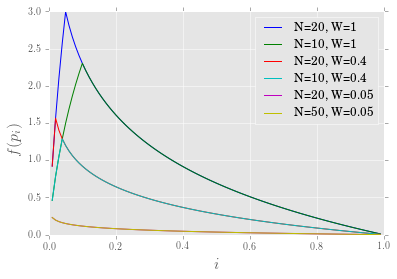

In [22]:
matplotlib.style.use('ggplot')
#plt.rcdefaults()
_dpi = 250
label_size = 16

N_Wvalues = [(20,1), (10,1), (20,0.4), (10,0.4), (20,0.05), (50,0.05)]
#N_Wvalues = [(50,1), (25,1), (50,0.4), (25,0.4), (50,0.05), (50,0.025)]
N_Wdict = {}
for tupl in N_Wvalues:
    N_Wdict[tupl] = 'N={0}, W={1}'.format(tupl[0],tupl[1])

colors = ('b', #blue
        'g',# green
        'r',# red
        'c',# cyan
        'm',# magenta
        'y',# yellow
        'k',# black
        'w')# white
_dpi = 250

label_size = 16
fig = plt.figure()
fig.dpi = _dpi
ax = plt.gca()
#ax.set_xlim((0,511.1))
#ax.set_ylim((0,2))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'$i$',fontsize=label_size)
plt.ylabel(r'$f(p_i)$',rotation='vertical', fontsize=label_size, horizontalalignment='right')

indexes = np.arange(0,1,0.01)

def heuristic(x,N,W):
    num = -x*np.log(x)
    den = max(1/N, x/W)
    return(num/den)

maxy=0
sampled_heuristic = N_Wdict.copy()
for tupl in sampled_heuristic.keys():
    sampled_heuristic[tupl] = np.zeros(len(indexes))
    i = 0
    for idx in indexes:
        f_pi = heuristic(idx,tupl[0],tupl[1])
        sampled_heuristic[tupl][i] = f_pi
        if f_pi > maxy:
            maxy = f_pi
        i+=1
    
for tupl,color in zip(N_Wvalues,colors):
    plt.plot(indexes,sampled_heuristic[tupl],color+'-',label=N_Wdict[tupl])
    #plt.plot(2*[tupl[1]/tupl[0]],[0,maxy], color+'--')

plt.legend(loc=1)
#plt.savefig("/home/renato/tesi/testogit/img/heur1.pdf",dpi=_dpi,bbox_inches='tight')
plt.show()

In [3]:

df = BPV.Data()
df.read_csv("p.delviva.csv",False)
df.df.sort_index(by="p",inplace=True,ascending=True)
df.df.set_index(pd.Index([j for j in range(len(df.df))]), inplace=True)
n = len(df.df)
df.df

,pattern-string,pattern-matrix,p,plog1onp
0,101010110,"[[1, 0, 1], [0, 1, 0], [1, 1, 0]]",0.000002,0.000027
1,10101011,"[[0, 1, 0], [1, 0, 1], [0, 1, 1]]",0.000002,0.000030
2,110001111,"[[1, 1, 0], [0, 0, 1], [1, 1, 1]]",0.000003,0.000033
3,10101010,"[[0, 1, 0], [1, 0, 1], [0, 1, 0]]",0.000003,0.000036
4,101010101,"[[1, 0, 1], [0, 1, 0], [1, 0, 1]]",0.000003,0.000036
5,100011110,"[[1, 0, 0], [0, 1, 1], [1, 1, 0]]",0.000003,0.000039
6,101011101,"[[1, 0, 1], [0, 1, 1], [1, 0, 1]]",0.000003,0.000039
7,11101011,"[[0, 1, 1], [1, 0, 1], [0, 1, 1]]",0.000003,0.000041
8,1110110,"[[0, 0, 1], [1, 1, 0], [1, 1, 0]]",0.000004,0.000047
9,110010110,"[[1, 1, 0], [0, 1, 0], [1, 1, 0]]",0.000004,0.000047


In [8]:
N=50
Wvalues = [0.1,0.025,0.01, 0.005]
Wvalues.sort()
#Wvalues = [0.1]
#colnames = []
Wdict = {}

for W in Wvalues:
    Wdict[W] = 'W={0}'.format(W)
    firstiter = True
    
    
prbl_heur = {}
for W,col in Wdict.items():
    print("Solution for W={0}".format(W))
    prbl_pulp = BPV.BPV("pulp",df,N,W,time_solver=False)
    prbl_pulp.solve()
    prbl_pulp.pprint_solution()

    prbl_heur[W] = BPV.BPV("heuristic",df,N,W,time_solver=False)
    prbl_heur[W].solve()
    #cProfile.run('prbl.solve()',sort=1)
    prbl_heur[W].pprint_solution()
    heur_data = prbl_heur[W].heuristic_cost
    heur_data = heur_data[df.df['heuristic'] == True]
    #minidx = true_indexes.index.min()
    #maxidx = true_indexes.index.max()
    #prbl_heur[W].minidx, prbl_heur[W].maxidx = minidx, maxidx
    prbl_heur[W].heur_data = heur_data
    
    print("-----------------------------------")
    

    #if firstiter:
    #    heur_costs=pd.DataFrame(heur_cost)
    #    heur_costs.columns = [W]
    #    firstiter = False
    #else:
    #    heur_costs[W] = heur_cost

#heur_costs 

Solution for W=0.025

Solver =  pulp 
Entropy =  0.18640048905319734 
Cardinality =  50 
Rate =  0.0249997725639

Solver =  heuristic 
Entropy =  0.171836583377 
Cardinality =  29 
Rate =  0.0242848651911
-----------------------------------
Solution for W=0.1

Solver =  pulp 
Entropy =  0.5558688690229753 
Cardinality =  50 
Rate =  0.089913564186

Solver =  heuristic 
Entropy =  0.555868869023 
Cardinality =  50 
Rate =  0.089913564186
-----------------------------------
Solution for W=0.01

Solver =  pulp 
Entropy =  0.08485957828401734 
Cardinality =  50 
Rate =  0.00999960577748

Solver =  heuristic 
Entropy =  0.0791767816978 
Cardinality =  38 
Rate =  0.00958996814884
-----------------------------------
Solution for W=0.005

Solver =  pulp 
Entropy =  0.04601712156576508 
Cardinality =  50 
Rate =  0.00499980288874

Solver =  heuristic 
Entropy =  0.0448046385593 
Cardinality =  43 
Rate =  0.00494066951113
-----------------------------------


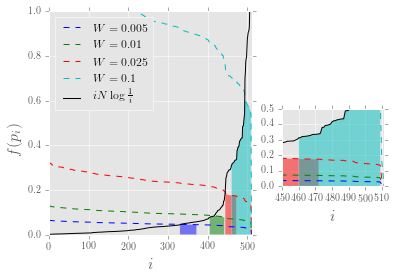

In [13]:
#plt.rcdefaults()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.style.use('ggplot')
colors = ('b', #blue
        'g',# green
        'r',# red
        'c',# cyan
        'm',# magenta
        'y',# yellow
        'k',# black
        'w')# white
_dpi = 250
label_size = 16

fN = lambda x: x *np.log(1/x)*N
fNs = fN(df.df['p'])
fig =plt.figure()
#fig, (ax1,ax2) = plt.subplots(1,2)
gs = gridspec.GridSpec(4,2, width_ratios=[2,1], height_ratios=[1,1,2,1])
#ax1 = plt.subplot(121)
#ax1 = plt.subplot2grid((4,4), (0,0), colspan = 3, rowspan = 4)
ax1 = plt.subplot(gs[:,0])
fig.dpi = _dpi
ax1.set_xlim((0,511.1))
ax1.set_ylim((0,1))
ax1.set_xlabel(r'$i$',fontsize=label_size)
ax1.set_ylabel(r'$f(p_i)$',rotation='vertical', fontsize=label_size, horizontalalignment='right')

for W,color in zip(Wvalues,colors):
    column = Wdict[W]
    fW = lambda x: np.log(1/x)*W
    fWs = fW(df.df['p'])
    ax1.plot(fWs,color+'--',label='$'+column+'$')
    ax1.fill_between(prbl_heur[W].heur_data.index,0,prbl_heur[W].heur_data,facecolor=color,alpha=0.5)
    
ax1.plot(fNs, 'k-',label='$i N \\log \\frac{1}{i}$')
ax1.legend(loc=2)

#gs.update(wspace=0.25)

#ax2 = plt.subplot(122, sharey = ax1)
#ax2 = plt.subplot2grid((4,4), (1,3), rowspan = 2)
ax2 = plt.subplot(gs[2:3,1])
ax2.set_xlim((450,511.1))
ax2.set_ylim((0,0.5))
ax2.figure.figsize = (20,20)
ax2.set_xlabel(r'$i$',fontsize=label_size)
#ax2.set_ylabel(r'$f(p_i)$',rotation='vertical', fontsize=label_size, horizontalalignment='right')

for W,color in zip(Wvalues,colors):
    column = Wdict[W]
    fW = lambda x: np.log(1/x)*W
    fWs = fW(df.df['p'])
    ax2.plot(fWs,color+'--',label='$'+column+'$')
    ax2.fill_between(prbl_heur[W].heur_data.index,0,prbl_heur[W].heur_data,facecolor=color,alpha=0.5)
#ax2.set_aspect('equal', adjustable='datalim')
ax2.plot(fNs, 'k-')

plt.savefig("/home/renato/tesi/testogit/img/heur2.pdf",dpi=_dpi,bbox_inches='tight')
plt.show()

In [ ]:
gs = gridspec.GridSpec

In [60]:
plt.subplot2grid?

In [69]:
plt.style.available

['bmh', 'grayscale', 'dark_background', 'fivethirtyeight', 'ggplot']